# Q7

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [17]:
w=2
k=6
m=1

#writing the function corresponsing to position derivative equals velocity

#We here have a 2N sized vector

def f1(vec, i, t):
    N=int(len(vec)/2)
    return vec[i+N]

#defining functions for equations which correspond to velocity derivative relarted to the position.

def f2(vec, i, t):
    N=int(len(vec)/2)
    if(i==0):
        return ((vec[1]-vec[0])*k + math.cos(w*t))/m
    if(i==N-1):
        return ((vec[N-2]-vec[N-1])*k)/m
    else:
        return (k*(vec[i+1]+vec[i-1]-2*vec[i]))/m
    
def func(vec, t):
    f=[]
    for i in range(2*N):
        if(i<N):
            f.append(f1(vec, i, t))
        else:
            f.append(f2(vec, i-N, t))
    return np.array(f)
            

In [20]:
def RK_4(x, t, func, h):
    f=func(x,t)
    k1=h*f
    k2=h*func(x+k1/2, t+h/2)
    k3=h*func(x+k2/2, t+h/2)
    k4=h*func(x+k3, t+h)
    x= x + (k1+2*k2+2*k3+k4)/6
    t= t + h
    f=[x,t]
    return np.array(f)

In [53]:
#assuming initial velocity and position of everything is 0
h=0.01
N=5
t=0
vec=[]
time=[]
init=np.zeros(2*N)
count=0
while(t<=20):
    init=RK_4(init, t, func, h)[0]
    t=RK_4(init, t, func, h)[1]
    vec.append(init)
    time.append(t)
    
vec=np.array(vec)

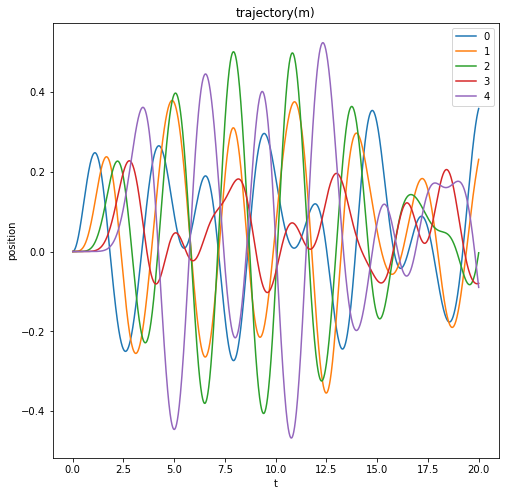

In [54]:
plt.figure(figsize=(8,8))
for i in range(N):
    plt.plot(time,vec[:,i], label=i)
    plt.xlabel("t")
    plt.ylabel("position")
plt.title('trajectory(m)')
plt.legend()